# 「ガウス過程と機械学習」
# P.81 ガウス過程回帰

In [1]:
using LinearAlgebra
using Plots

## 観測データの生成

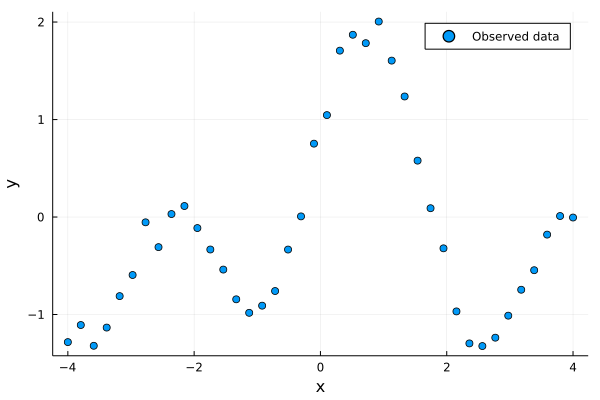

In [2]:
N = 40
x_train = range(-4, 4, length=N)
f(x) = sin(2x) + cos(x-π/5) + 0.1 * randn()
y_train = f.(x_train)
scatter(x_train, y_train, xlab="x", ylab="y", label="Observed data")

## パラメータの設定

In [3]:
θ = rand(3)
θ₁, θ₂, θ₃ = θ

3-element Vector{Float64}:
 0.9312686010495987
 0.7877613526010105
 0.14108273887509437

## ガウスカーネル関数を定義

In [4]:
k(x1, x2, θ₁, θ₂, θ₃) = θ₁ .* exp.(-(x1' .- x2).^2 ./ θ₂) + θ₃ .* (x1' .== x2)

k (generic function with 1 method)

## ガウス過程回帰を計算

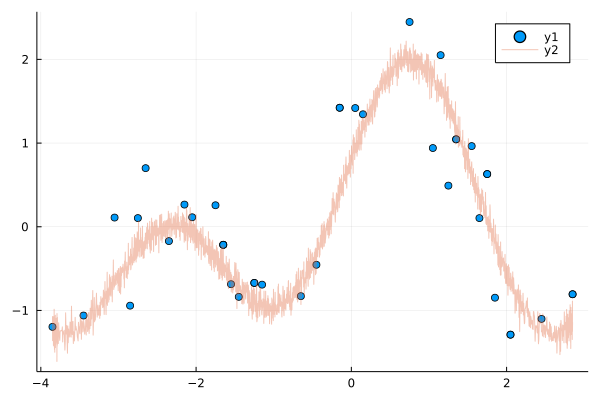

In [5]:
x_test = rand((-4+0.05):0.1:4, 40)
K = k(x_train, x_train, θ₁, θ₂, θ₃)
k_ = k(x_test, x_train, θ₁, θ₂, θ₃)
k__ = k(x_test, x_test, θ₁, θ₂, θ₃)

invK = inv(K)
Σ̂ = k__ - k_' * invK * k_
μ̂ = k_' * invK * y_train

ŷ = μ̂ + real(√Σ̂) * randn(length(x_test))
scatter(x_test, ŷ)
plot!(f, alpha=0.4)